In [1]:
#Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load and Explore the Data

In [7]:
# Load the data
df = pd.read_csv('Downloads/HRDataset_v14.csv')

# Display the first few rows
print(df.head())




              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [8]:
# Get information about the data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [14]:
# Step 2: Data Cleaning
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
DateofHire                    0
DateofHire.1                  0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [11]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [12]:
# Convert date columns to datetime
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DOB'] = pd.to_datetime(df['DOB'])


In [35]:
# Data Cleaning: Remove leading/trailing whitespace from the 'Sex' column
df['Sex'] = df['Sex'].str.strip()

In [16]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [17]:
# Descriptive statistics for numerical columns
desc_stats = df.describe()
print(desc_stats)

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25156.636930   
min      1.000

In [25]:
# Calculate descriptive statistics for all employees
all_employees_stats = df['Salary'].describe()
print("Descriptive Statistics for All Employees:")
print(all_employees_stats)

Descriptive Statistics for All Employees:
count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64


In [29]:
# Calculate descriptive statistics for female employees
female_employees_stats = df[df['Sex'] == 'F']['Salary'].describe()
print("\nDescriptive Statistics for Female Employees:")
print(female_employees_stats)


Descriptive Statistics for Female Employees:
count       176.000000
mean      67786.727273
std       25805.669834
min       45046.000000
25%       55397.500000
50%       62066.500000
75%       68238.250000
max      250000.000000
Name: Salary, dtype: float64


In [37]:
# Calculate descriptive statistics for male employees
male_employees_stats = df[df['Sex'] == 'M']['Salary'].describe()
print("\nDescriptive Statistics for Male Employees:")
print(male_employees_stats)


Descriptive Statistics for Male Employees:
count       135.000000
mean      70629.400000
std       24285.293173
min       45115.000000
25%       55650.000000
50%       63353.000000
75%       75655.000000
max      178000.000000
Name: Salary, dtype: float64


In [34]:
# Print a sample of the 'Sex' column values to inspect the data
print(df['Sex'].head())

# Check the unique values in the 'Sex' column
print(df['Sex'].unique())


0    M 
1    M 
2     F
3     F
4     F
Name: Sex, dtype: object
['M ' 'F']


# Data Visualization

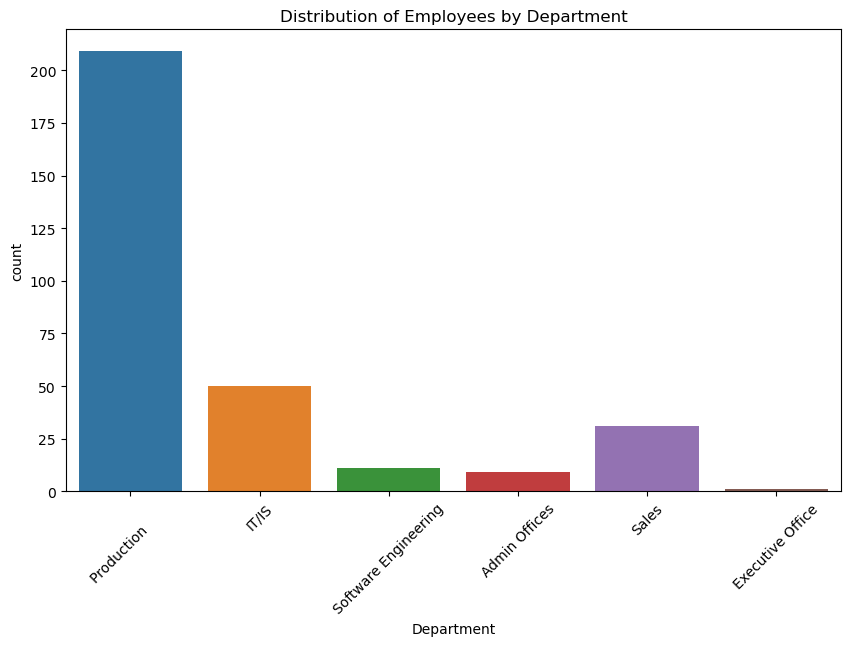

In [18]:
# Bar chart of employees by department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df)
plt.title('Distribution of Employees by Department')
plt.xticks(rotation=45)
plt.show()

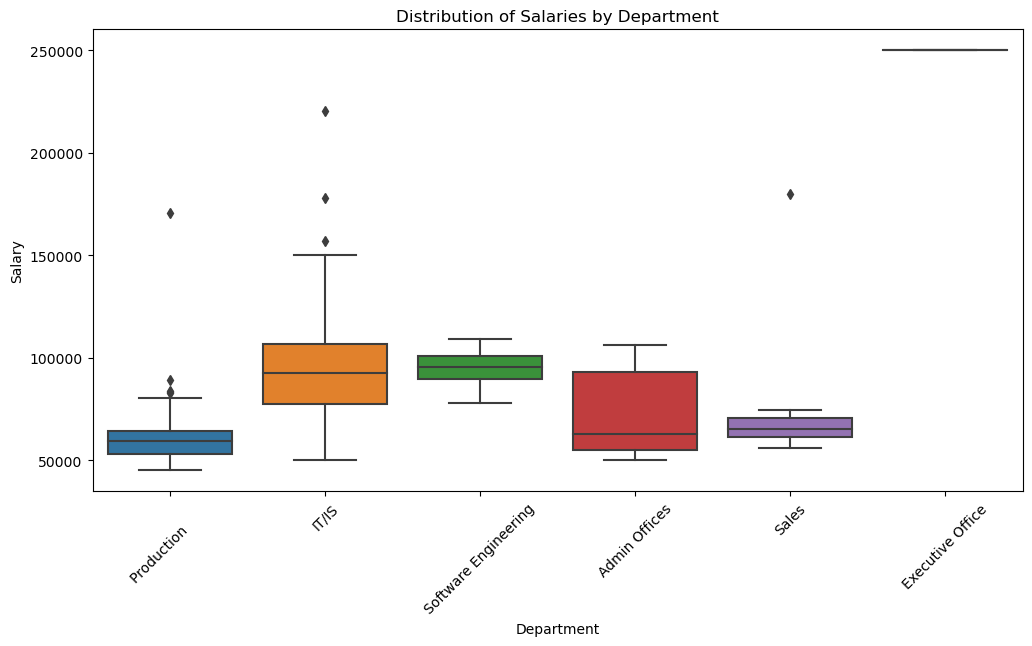

In [19]:
# Box plot of salaries by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Distribution of Salaries by Department')
plt.xticks(rotation=45)
plt.show()

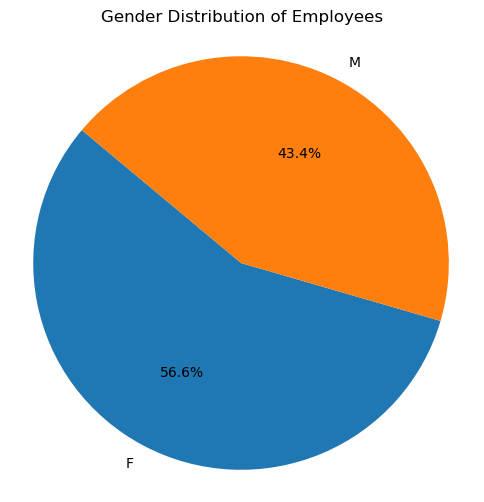

In [20]:
# Pie chart of gender distribution
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Employees')
plt.axis('equal')
plt.show()

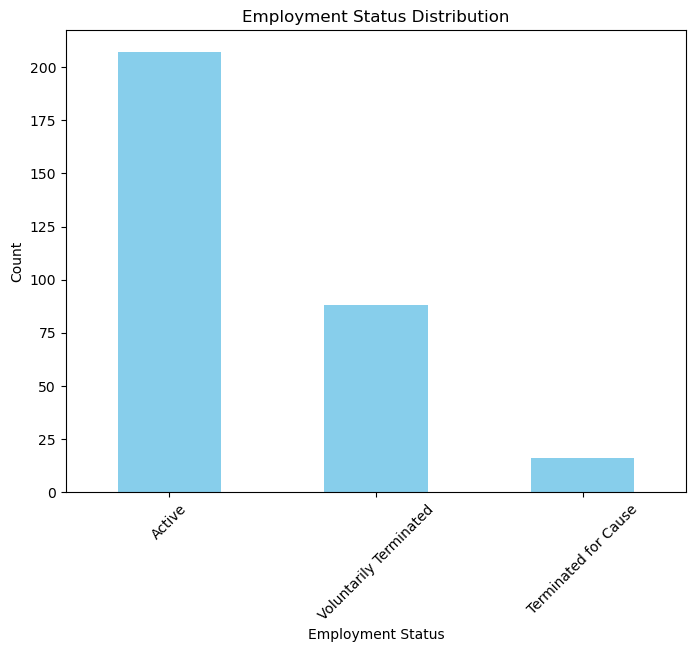

In [21]:
# Create a histogram for EmploymentStatus
plt.figure(figsize=(8, 6))
df['EmploymentStatus'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

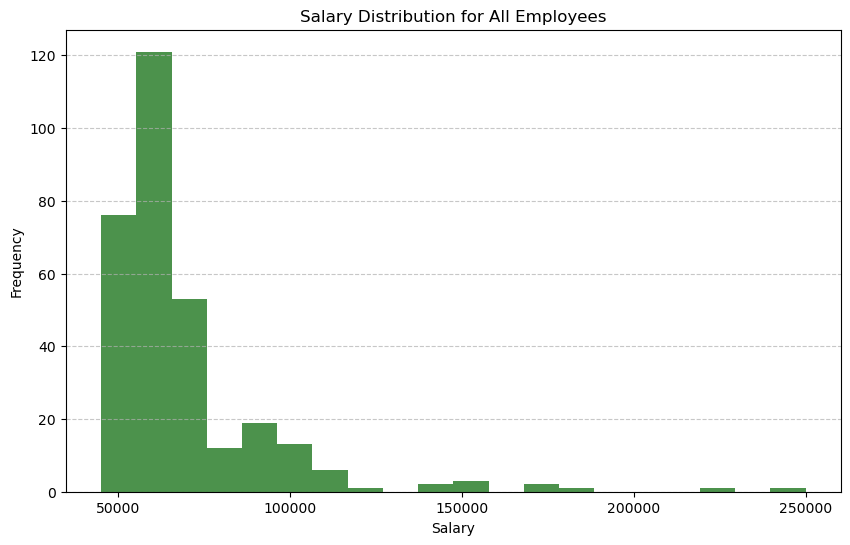

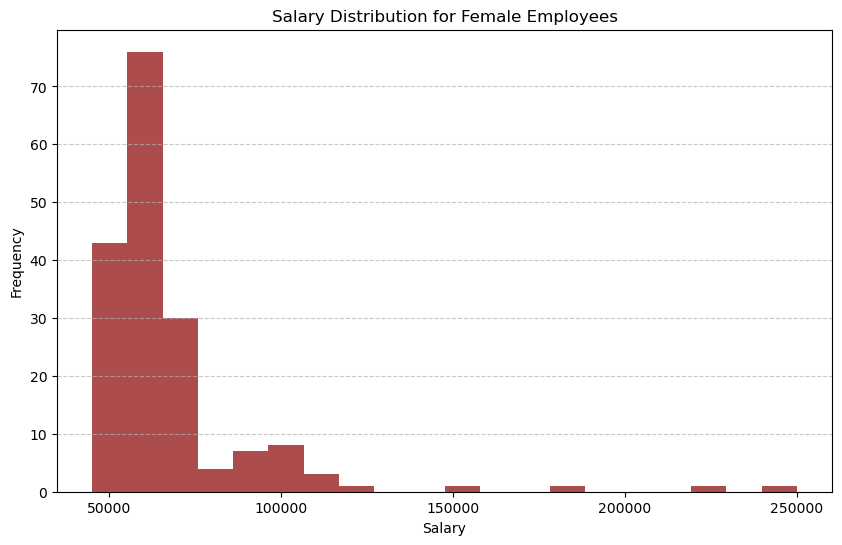

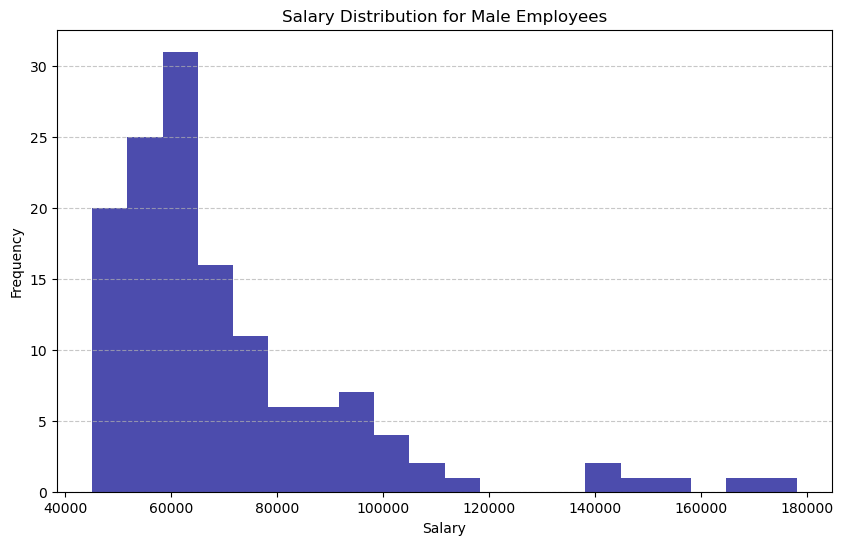

In [48]:
# Bar graph for all employees,female employees and Male employess
# Create separate DataFrames for female and male employees
female_df = df[df['Sex'] == 'F']
male_df = df[df['Sex'] == 'M']

# Create histograms to visualize salary distribution

# Salary distribution for all employees
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=20, color='darkgreen', alpha=0.7)
plt.title('Salary Distribution for All Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Salary distribution for female employees
plt.figure(figsize=(10, 6))
plt.hist(female_df['Salary'], bins=20, color='darkred', alpha=0.7)
plt.title('Salary Distribution for Female Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Salary distribution for male employees
plt.figure(figsize=(10, 6))
plt.hist(male_df['Salary'], bins=20, color='darkblue', alpha=0.7)
plt.title('Salary Distribution for Male Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
#Descriptive stats for Absences for employees 
# Calculate descriptive statistics for all employees
all_employees_stats = df['Absences'].describe()

# Calculate descriptive statistics for female employees (where Sex is 'F')
female_employees_stats = df[df['Sex'] == 'F']['Absences'].describe()

# Calculate descriptive statistics for male employees (where Sex is 'M')
male_employees_stats = df[df['Sex'] == 'M']['Absences'].describe()

# Print the results
print("Descriptive Statistics for Absences (All Employees):")
print(all_employees_stats)

print("\nDescriptive Statistics for Absences (Female Employees):")
print(female_employees_stats)

print("\nDescriptive Statistics for Absences (Male Employees):")
print(male_employees_stats)

Descriptive Statistics for Absences (All Employees):
count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64

Descriptive Statistics for Absences (Female Employees):
count    176.000000
mean      10.261364
std        5.994272
min        1.000000
25%        5.000000
50%       10.000000
75%       16.000000
max       20.000000
Name: Absences, dtype: float64

Descriptive Statistics for Absences (Male Employees):
count    135.000000
mean      10.207407
std        5.684617
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64


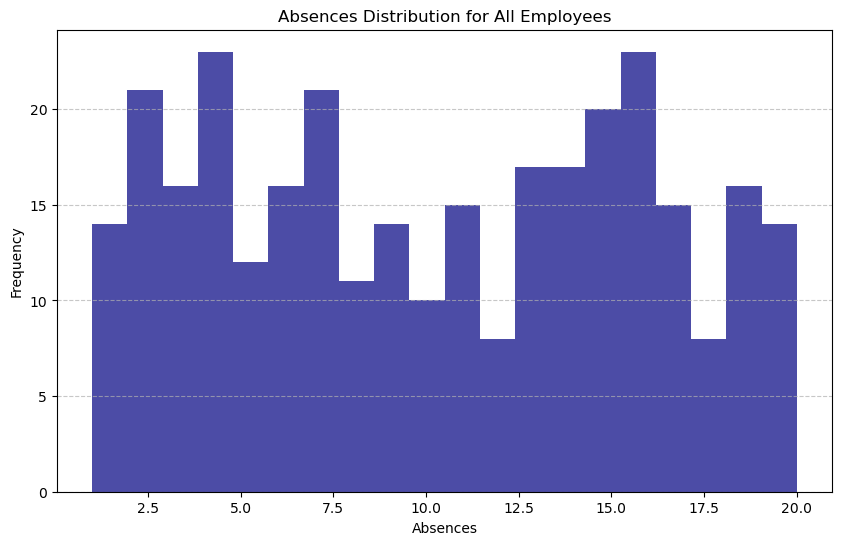

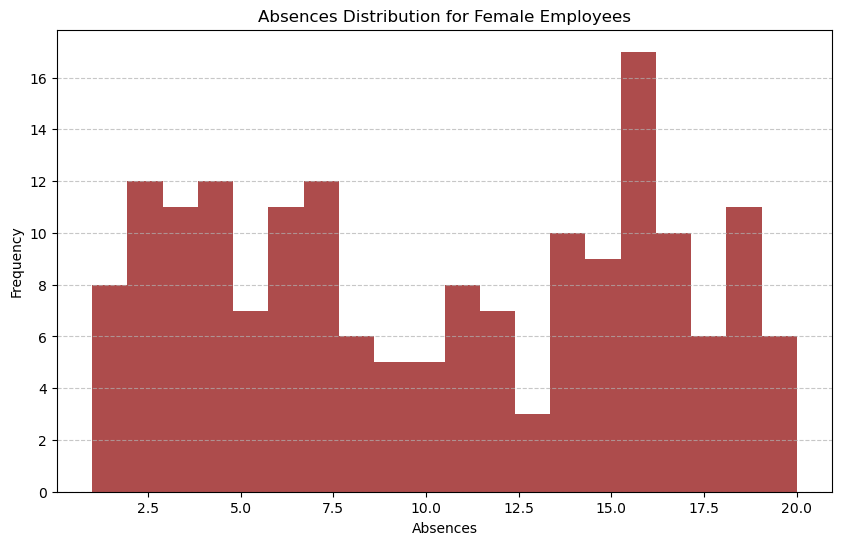

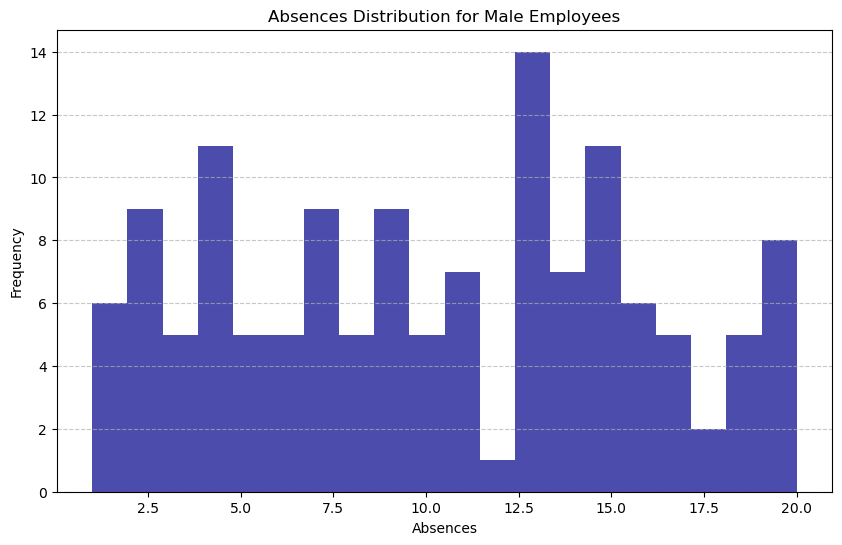

In [52]:
#Visualization for absences
# Create separate DataFrames for female and male employees
female_df = df[df['Sex'] == 'F']
male_df = df[df['Sex'] == 'M']

# Create histograms to visualize Absences distribution

# Absences distribution for all employees
plt.figure(figsize=(10, 6))
plt.hist(df['Absences'], bins=20, color='navy', alpha=0.7)
plt.title('Absences Distribution for All Employees')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Absences distribution for female employees
plt.figure(figsize=(10, 6))
plt.hist(female_df['Absences'], bins=20, color='darkred', alpha=0.7)
plt.title('Absences Distribution for Female Employees')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Absences distribution for male employees
plt.figure(figsize=(10, 6))
plt.hist(male_df['Absences'], bins=20, color='darkblue', alpha=0.7)
plt.title('Absences Distribution for Male Employees')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

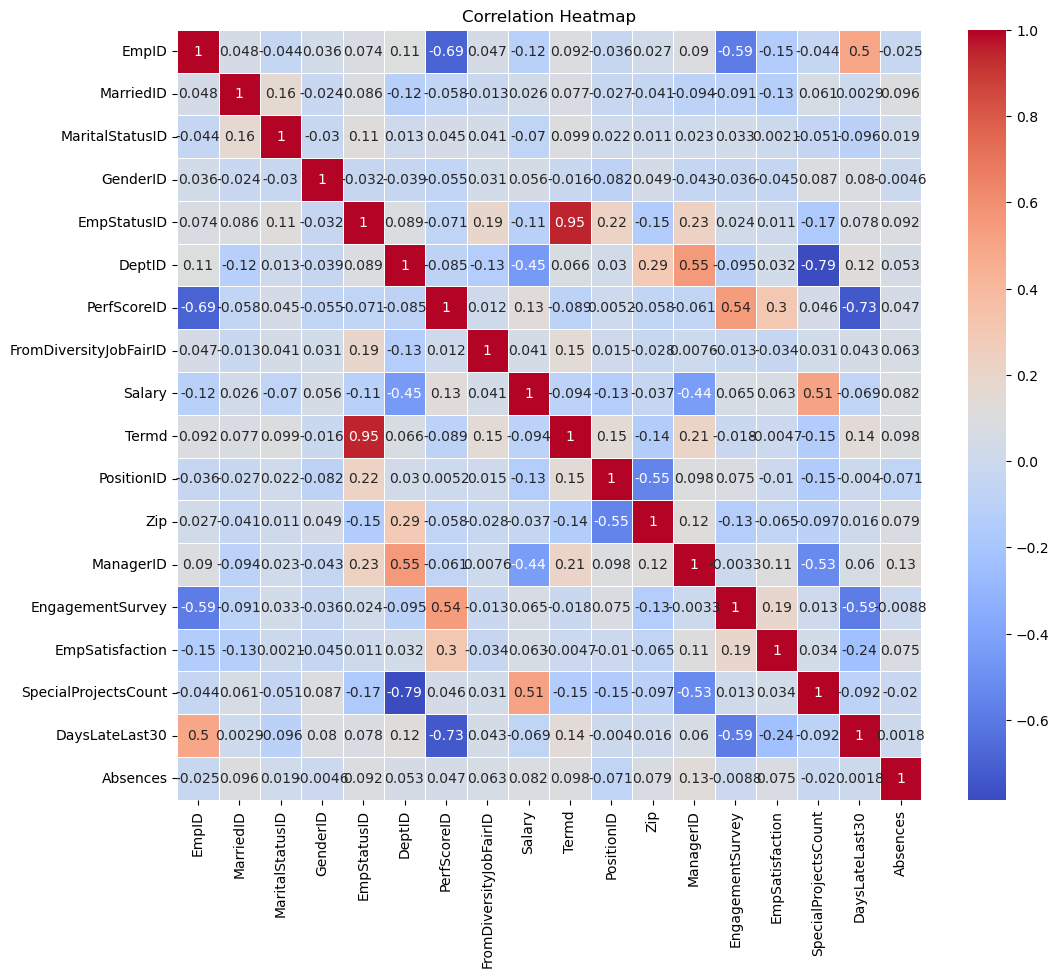

In [53]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Performance of Employees

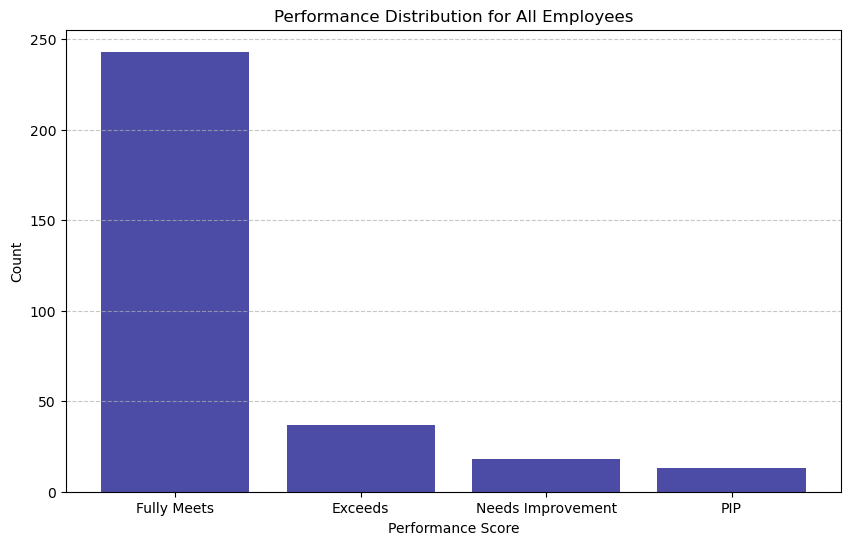

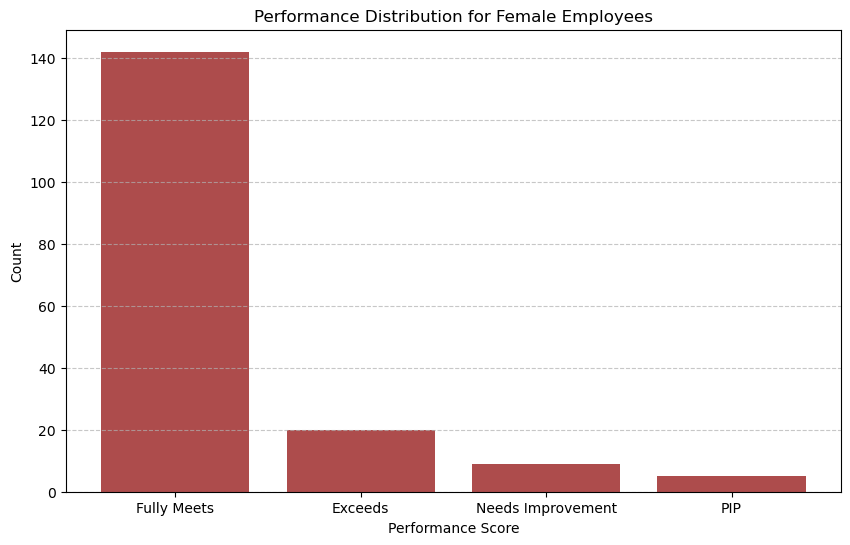

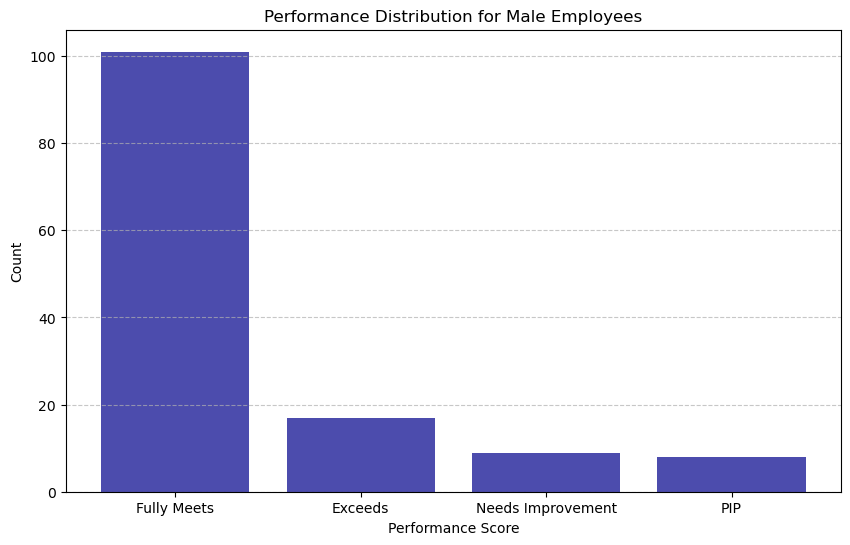

Descriptive Statistics for Performance (All Employees):
count             311
unique              4
top       Fully Meets
freq              243
Name: PerformanceScore, dtype: object

Descriptive Statistics for Performance (Female Employees):
count             176
unique              4
top       Fully Meets
freq              142
Name: PerformanceScore, dtype: object

Descriptive Statistics for Performance (Male Employees):
count             135
unique              4
top       Fully Meets
freq              101
Name: PerformanceScore, dtype: object


In [56]:
# Create separate DataFrames for female and male employees
female_df = df[df['Sex'] == 'F']
male_df = df[df['Sex'] == 'M']

# Create bar graphs to visualize performance

# Performance distribution for all employees
plt.figure(figsize=(10, 6))
plt.bar(df['PerformanceScore'].value_counts().index, df['PerformanceScore'].value_counts().values, color='navy', alpha=0.7)
plt.title('Performance Distribution for All Employees')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Performance distribution for female employees
plt.figure(figsize=(10, 6))
plt.bar(female_df['PerformanceScore'].value_counts().index, female_df['PerformanceScore'].value_counts().values, color='darkred', alpha=0.7)
plt.title('Performance Distribution for Female Employees')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Performance distribution for male employees
plt.figure(figsize=(10, 6))
plt.bar(male_df['PerformanceScore'].value_counts().index, male_df['PerformanceScore'].value_counts().values, color='darkblue', alpha=0.7)
plt.title('Performance Distribution for Male Employees')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate descriptive statistics for performance

# Descriptive stats for all employees
all_employees_performance_stats = df['PerformanceScore'].describe()

# Descriptive stats for female employees
female_employees_performance_stats = female_df['PerformanceScore'].describe()

# Descriptive stats for male employees
male_employees_performance_stats = male_df['PerformanceScore'].describe()

# Print the results
print("Descriptive Statistics for Performance (All Employees):")
print(all_employees_performance_stats)

print("\nDescriptive Statistics for Performance (Female Employees):")
print(female_employees_performance_stats)

print("\nDescriptive Statistics for Performance (Male Employees):")
print(male_employees_performance_stats)

In [57]:
# Calculate performance statistics for all employees
all_employees_perf = df.groupby('Sex')['PerformanceScore'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate performance statistics for female employees
female_employees_perf = df[df['Sex'] == 'F']['PerformanceScore'].value_counts(normalize=True)

# Calculate performance statistics for male employees
male_employees_perf = df[df['Sex'] == 'M']['PerformanceScore'].value_counts(normalize=True)

# Create tables to display performance statistics

# Performance statistics for all employees
print("Performance Statistics for All Employees:")
print(all_employees_perf)

# Performance statistics for female employees
print("\nPerformance Statistics for Female Employees:")
print(female_employees_perf)

# Performance statistics for male employees
print("\nPerformance Statistics for Male Employees:")
print(male_employees_perf)

Performance Statistics for All Employees:
PerformanceScore   Exceeds  Fully Meets  Needs Improvement       PIP
Sex                                                                 
F                 0.113636     0.806818           0.051136  0.028409
M                 0.125926     0.748148           0.066667  0.059259

Performance Statistics for Female Employees:
Fully Meets          0.806818
Exceeds              0.113636
Needs Improvement    0.051136
PIP                  0.028409
Name: PerformanceScore, dtype: float64

Performance Statistics for Male Employees:
Fully Meets          0.748148
Exceeds              0.125926
Needs Improvement    0.066667
PIP                  0.059259
Name: PerformanceScore, dtype: float64


# Employees and Department 

In [59]:
# Create a pivot table to count employees by department and sex
pivot_table = df.pivot_table(index=['Department', 'Sex'], values='Employee_Name', aggfunc='count')

# Rename the column to 'Count'
pivot_table.rename(columns={'Employee_Name': 'Count'}, inplace=True)

# Reset the index to make the table more readable
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)

              Department Sex  Count
0          Admin Offices   F      6
1          Admin Offices   M      3
2       Executive Office   F      1
3                  IT/IS   F     22
4                  IT/IS   M     28
5      Production          F    126
6      Production          M     83
7                  Sales   F     15
8                  Sales   M     16
9   Software Engineering   F      6
10  Software Engineering   M      5


In [60]:
# Calculate performance statistics for each department
department_perf = df.groupby('Department')['PerformanceScore'].value_counts(normalize=True).unstack(fill_value=0)

# Create tables to display performance statistics for each department

# Performance statistics for each department
print("Performance Statistics for Each Department:")
print(department_perf)

Performance Statistics for Each Department:
PerformanceScore       Exceeds  Fully Meets  Needs Improvement       PIP
Department                                                              
Admin Offices         0.000000     1.000000           0.000000  0.000000
Executive Office      0.000000     1.000000           0.000000  0.000000
IT/IS                 0.120000     0.840000           0.020000  0.020000
Production            0.129187     0.760766           0.071770  0.038278
Sales                 0.064516     0.774194           0.032258  0.129032
Software Engineering  0.181818     0.727273           0.090909  0.000000


# Performance of Department 

In [63]:

# Calculate performance statistics for each department
department_perf = df.groupby(['Department', 'PerformanceScore'])['Employee_Name'].count().unstack(fill_value=0)

# Create tables to display performance statistics for each department

# Performance statistics for each department
print("Performance Statistics (Counts) for Each Department:")
print(department_perf)

Performance Statistics (Counts) for Each Department:
PerformanceScore      Exceeds  Fully Meets  Needs Improvement  PIP
Department                                                        
Admin Offices               0            9                  0    0
Executive Office            0            1                  0    0
IT/IS                       6           42                  1    1
Production                 27          159                 15    8
Sales                       2           24                  1    4
Software Engineering        2            8                  1    0
